In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn.metrics
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
data2018=pd.read_csv("ground_water_quality_2018_post.csv")
data2019=pd.read_csv("ground_water_quality_2019_post.csv")
data2020=pd.read_csv("ground_water_quality_2020_post.csv")

In [3]:
data2018.shape

(374, 26)

In [4]:
data2018.isnull().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 3
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

In [5]:
data2019.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                   5
season                0
pH                    0
EC                    0
TDS                   0
CO_-2               160
HCO_ -                0
Cl -                  0
F -                   0
NO3-                  0
SO4-2                 0
Na+                   0
K+                    0
Ca+2                  0
Mg+2                  0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

In [6]:
data2020.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                   3
season                0
Unnamed: 8          368
pH                    0
E.C                   0
TDS                   0
CO3                   0
HCO3                  0
Cl                    0
F                     0
NO3                   0
SO4                   0
Na                    0
K                     0
Ca                    0
Mg                    0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

In [7]:
data2020.drop("Unnamed: 8",axis=1, inplace=True)

In [8]:
column_name_mappings={'CO_-2 ':'CO3', 'HCO_ - ':'HCO3', 'Cl -':'Cl', 'F -':'F','NO3- ':'NO3 ', 'SO4-2':'SO4', 'Na+':'Na', 'K+':'K', 'Ca+2':'Ca', 'Mg+2':'Mg','EC':'E.C'
                     }
data2019.rename(columns=column_name_mappings,inplace=True)

In [9]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               364 non-null    int64  
 1   district          364 non-null    object 
 2   mandal            364 non-null    object 
 3   village           364 non-null    object 
 4   lat_gis           364 non-null    float64
 5   long_gis          364 non-null    float64
 6   gwl               359 non-null    float64
 7   season            364 non-null    object 
 8   pH                364 non-null    float64
 9   E.C               364 non-null    int64  
 10  TDS               364 non-null    float64
 11  CO3               204 non-null    float64
 12  HCO3              364 non-null    int64  
 13  Cl                364 non-null    int64  
 14  F                 364 non-null    float64
 15  NO3               364 non-null    float64
 16  SO4               364 non-null    float64
 1

In [10]:
median_groundwater_by_district_2018 = data2018.groupby('district')['gwl'].median()
median_groundwater_by_district_2019 = data2019.groupby('district')['gwl'].median()
median_groundwater_by_district_2020 = data2020.groupby('district')['gwl'].median()

In [11]:
def impute_missing_with_median(row):
    if pd.isnull(row['gwl']):
        return median_groundwater_by_district_2019[row['district']]
    else:
        return row['gwl']


data2018['gwl'] = data2018.apply(impute_missing_with_median, axis=1)
data2019['gwl'] = data2019.apply(impute_missing_with_median, axis=1)
data2020['gwl'] = data2020.apply(impute_missing_with_median, axis=1)

In [12]:
missing2019=data2019[data2019['CO3'].isnull()]
missing2019['district'].value_counts()

NIZAMABAD            23
NALGONDA             22
KAMAREDDY            20
VIKARABAD            16
KHAMMAM              15
BHADRADRI            10
MAHABUBNAGAR          8
SANGAREDDY            7
JOGULAMBA(GADWAL)     7
NARAYANPET            7
HYDERABAD             7
SIDDIPET              7
MEDCHAL               6
SURYAPET              5
Name: district, dtype: int64

In [13]:
df_missing=data2019[['pH','CO3']]
df_subset = df_missing.dropna(subset=['CO3', 'pH'])

In [14]:
#taking X and y for prediction
X_train = df_subset['pH'].values.reshape(-1, 1)
y_train = df_subset['CO3'].values

In [15]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
X_missing_values = df_missing.loc[df_missing['CO3'].isnull(), 'pH'].values.reshape(-1, 1)

# Predict the missing values
predicted_missing_values = model.predict(X_missing_values)

# Update the missing values in the original dataset with the predicted values
df_missing.loc[df_missing['CO3'].isnull(), 'CO3'] = predicted_missing_values

In [17]:
data2019['CO3']=df_missing['CO3']

In [18]:
missing2019=data2019[data2019['CO3'].isnull()]
missing2019['district'].value_counts()

Series([], Name: district, dtype: int64)

In [19]:
water_data=pd.concat([data2018,data2019,data2020])
water_data.to_csv('cleaned_ground_water_data.csv', index=False)

In [20]:
water_data.loc[261,'pH']=8.05
water_data['pH']=water_data.loc[:,'pH'].astype(float)

In [21]:
Columns_to_drop=['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis','season','RSC  meq  / L','Classification.1']
Water_data=water_data.drop(columns=Columns_to_drop,inplace=True)

In [22]:
water_data.head()

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,Classification
0,5.09,8.28,745,476.80,0.0,220.0,60,0.44,42.276818,46.0,49.0,4.0,48.0,38.896,279.934211,1.273328,C2S1
1,5.10,8.29,921,589.44,0.0,230.0,80,0.56,100.659091,68.0,42.0,5.0,56.0,63.206,399.893092,0.913166,C3S1
2,4.98,7.69,510,326.40,0.0,200.0,30,0.66,41.471545,44.0,45.0,2.0,24.0,38.896,219.934211,1.319284,C2S1
3,5.75,8.09,422,270.08,0.0,160.0,10,0.58,10.669864,35.0,27.0,1.0,32.0,19.448,159.967105,0.928155,C2S1
4,2.15,8.21,2321,1485.44,0.0,300.0,340,2.56,128.843636,280.0,298.0,5.0,56.0,92.378,519.843750,5.682664,C4S2


In [23]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 0 to 367
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gwl             1106 non-null   float64
 1   pH              1106 non-null   float64
 2   E.C             1106 non-null   int64  
 3   TDS             1106 non-null   float64
 4   CO3             1106 non-null   float64
 5   HCO3            1106 non-null   float64
 6   Cl              1106 non-null   int64  
 7   F               1106 non-null   float64
 8   NO3             1106 non-null   float64
 9   SO4             1106 non-null   float64
 10  Na              1106 non-null   float64
 11  K               1106 non-null   float64
 12  Ca              1106 non-null   float64
 13  Mg              1106 non-null   float64
 14  T.H             1106 non-null   float64
 15  SAR             1106 non-null   float64
 16  Classification  1106 non-null   object 
dtypes: float64(14), int64(2), object(1

In [24]:
water_data['Cl']=water_data['Cl'].astype(float)

In [25]:
water_data['E.C']=water_data['E.C'].astype(float)

In [26]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 0 to 367
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gwl             1106 non-null   float64
 1   pH              1106 non-null   float64
 2   E.C             1106 non-null   float64
 3   TDS             1106 non-null   float64
 4   CO3             1106 non-null   float64
 5   HCO3            1106 non-null   float64
 6   Cl              1106 non-null   float64
 7   F               1106 non-null   float64
 8   NO3             1106 non-null   float64
 9   SO4             1106 non-null   float64
 10  Na              1106 non-null   float64
 11  K               1106 non-null   float64
 12  Ca              1106 non-null   float64
 13  Mg              1106 non-null   float64
 14  T.H             1106 non-null   float64
 15  SAR             1106 non-null   float64
 16  Classification  1106 non-null   object 
dtypes: float64(16), object(1)
memory u

In [27]:
water_data.isnull().sum()

gwl               0
pH                0
E.C               0
TDS               0
CO3               0
HCO3              0
Cl                0
F                 0
NO3               0
SO4               0
Na                0
K                 0
Ca                0
Mg                0
T.H               0
SAR               0
Classification    0
dtype: int64

In [28]:
water_data['Classification'].value_counts()

C3S1    696
C2S1    248
C4S1     87
C4S2     36
C3S2     12
C4S4      7
C3S3      6
C4S3      5
C1S1      3
O.G       2
OG        2
C3S4      1
C2S2      1
Name: Classification, dtype: int64

In [29]:
water_data.corr()

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR
gwl,1.000000,-0.100006,-0.033191,-0.033191,-0.027261,-0.008416,-0.027017,0.066193,-0.000129,-0.132788,-0.083766,-0.063029,0.045547,-0.021435,0.014601,-0.069976
pH,-0.100006,1.000000,-0.167119,-0.167119,0.600428,-0.119147,-0.187895,0.136430,-0.098089,0.047014,0.087666,0.009456,-0.444366,-0.108793,-0.338736,0.244655
E.C,-0.033191,-0.167119,1.000000,1.000000,-0.064630,0.604290,0.937154,0.078763,0.565982,0.403046,0.805623,0.289333,0.633168,0.732839,0.835927,0.485232
TDS,-0.033191,-0.167119,1.000000,1.000000,-0.064630,0.604290,0.937154,0.078763,0.565982,0.403046,0.805623,0.289333,0.633168,0.732839,0.835927,0.485232
CO3,-0.027261,0.600428,-0.064630,-0.064630,1.000000,-0.026405,-0.100491,0.187801,-0.081423,-0.031862,0.111685,-0.007531,-0.222333,-0.104571,-0.200005,0.246174
HCO3,-0.008416,-0.119147,0.604290,0.604290,-0.026405,1.000000,0.368176,0.351965,0.166309,0.107907,0.630861,0.135203,0.251738,0.403065,0.400872,0.534163
Cl,-0.027017,-0.187895,0.937154,0.937154,-0.100491,0.368176,1.000000,-0.052746,0.453252,0.351377,0.707487,0.231955,0.652441,0.705381,0.830834,0.359258
F,0.066193,0.136430,0.078763,0.078763,0.187801,0.351965,-0.052746,1.000000,-0.063521,0.022158,0.233060,-0.037496,-0.137676,0.000441,-0.083900,0.374330
NO3,-0.000129,-0.098089,0.565982,0.565982,-0.081423,0.166309,0.453252,-0.063521,1.000000,0.133826,0.336259,0.335962,0.415151,0.492817,0.555552,0.134042
SO4,-0.132788,0.047014,0.403046,0.403046,-0.031862,0.107907,0.351377,0.022158,0.133826,1.000000,0.440910,0.293191,0.164852,0.274108,0.268450,0.306554


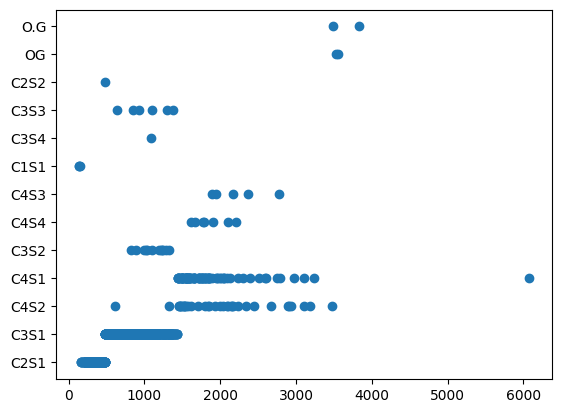

In [30]:
plt.scatter(water_data['TDS'],water_data['Classification'])

In [31]:
water_data = water_data[~water_data['Classification'].isin(['C3S4', 'C2S2','OG','O.G'])]

In [32]:
#splitting train and test by startified
X=water_data.drop(['Classification'],axis=1)
y=water_data['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [33]:
X_train

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR
223,15.26,8.29,879.0,562.56,0.000000,388.689925,20.0,2.040,14.837150,6.0,83.442126,1.98,72.0,19.448,259.967105,2.250082
237,2.52,8.01,620.0,396.80,0.000000,160.000000,70.0,0.660,43.887364,73.0,69.000000,2.00,32.0,34.034,219.942434,2.022864
61,20.48,8.38,2016.0,1290.24,20.000000,770.000000,130.0,2.620,20.949170,27.0,363.000000,3.50,24.0,38.896,219.934211,10.642224
227,1.60,8.28,710.0,454.40,0.000000,280.000000,50.0,0.910,13.689636,76.0,81.000000,3.00,32.0,48.620,279.917763,2.104951
307,12.67,7.19,1240.0,793.60,0.000000,290.000000,150.0,1.290,56.369091,82.0,196.000000,9.00,56.0,14.586,199.975329,6.026151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2.80,7.78,2340.0,1497.60,6.002408,580.000000,280.0,0.710,211.263300,33.0,231.000000,5.50,152.0,72.930,679.876645,3.851847
121,6.69,8.15,212.0,135.68,0.000000,30.000000,20.0,0.110,22.547636,31.0,22.000000,1.00,8.0,9.724,59.983553,1.235034
312,2.31,7.99,771.0,493.44,0.000000,280.000000,50.0,0.511,9.478060,9.0,32.600000,2.26,56.0,38.896,299.934211,0.818421
363,9.90,7.80,2324.0,1487.36,0.000000,370.000000,370.0,0.580,336.161100,33.0,169.300000,2.60,160.0,97.240,799.835526,2.602728


In [34]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [35]:
X_train_normalized

array([[ 0.93543991,  0.92089672, -0.54112079, ..., -0.79457172,
        -0.56992202, -0.17737113],
       [-0.78592387,  0.30329894, -0.84850992, ..., -0.42475131,
        -0.72161892, -0.25945876],
       [ 1.64073967,  1.11941029,  0.80830565, ..., -0.30147784,
        -0.72165009,  2.85448457],
       ...,
       [-0.814298  ,  0.25918482, -0.66929849, ..., -0.30147784,
        -0.4184433 , -0.69459178],
       [ 0.21122406, -0.15989939,  1.17384948, ...,  1.1778038 ,
         1.47622511, -0.04996957],
       [-0.14142581,  2.31049171, -0.448548  , ..., -0.67129825,
        -0.94896168,  1.00927221]])

In [36]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

Model training

In [37]:
#pca
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

In [38]:
import pickle
pickle.dump(pca,open('pca.pkl','wb'))

In [39]:
pca.explained_variance_ratio_

array([0.40768519, 0.16191433, 0.08454561, 0.07069858, 0.06148028,
       0.05190906, 0.04107261, 0.04036688, 0.0319738 , 0.02288451,
       0.0201434 , 0.00441416])

In [40]:
sum(pca.explained_variance_ratio_)

0.9990883993258772

In [41]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [42]:
import pickle
pickle.dump(encoder,open('encoder.pkl','wb'))

In [43]:
#best model = XGBoost

best_model = xgb.XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)  # Replace with the selected best model
best_model.fit(X_train_pca, y_train_encoded)

#Evaluate the final model on the test set

y_test_pred = best_model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"\nFinal Model - Test Accuracy: {test_accuracy:.4f}")


Final Model - Test Accuracy: 0.9152


In [44]:
y_test_pred

array([1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 6, 2, 1, 1, 2, 2, 2, 2, 2, 2, 5, 5,
       5, 2, 2, 1, 2, 1, 2, 2, 5, 1, 5, 4, 1, 2, 2, 2, 2, 2, 2, 1, 2, 5,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 5, 5, 2, 2, 5, 2, 2,
       2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 1, 5, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 5, 2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 5, 5, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 6, 2,
       1, 5, 5, 1, 1, 2, 7, 5, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 5, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 6, 2, 2, 2, 2, 1, 2, 2, 1, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 6, 2, 5, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 5, 2, 2, 2, 2, 2,
       2, 5, 2, 1, 5, 2, 2, 1, 1, 2, 2, 2, 5, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 2, 1, 6, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 5, 2, 2, 2, 1, 2, 5, 2, 5,
       1, 5, 2, 1, 1, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2,

In [45]:
best_model.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 1000,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [46]:
reg_pred=best_model.predict(X_test_pca)

In [47]:
import pickle
with open('WaterQualityClassification.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [48]:
encoded_classes = encoder.classes_

for i, class_label in enumerate(encoded_classes):
    print(f"Class Label: {class_label} - Encoded Value: {i}")

Class Label: C1S1 - Encoded Value: 0
Class Label: C2S1 - Encoded Value: 1
Class Label: C3S1 - Encoded Value: 2
Class Label: C3S2 - Encoded Value: 3
Class Label: C3S3 - Encoded Value: 4
Class Label: C4S1 - Encoded Value: 5
Class Label: C4S2 - Encoded Value: 6
Class Label: C4S3 - Encoded Value: 7
Class Label: C4S4 - Encoded Value: 8


In [49]:
def prediction(data):
    with open('WaterQualityClassification.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

    new_data=np.array(data)
    new_data_normalised=scaler.transform(new_data.reshape(1,-1))
    new_data_pca=pca.transform(new_data_normalised)
    predicted_class = loaded_model.predict(new_data_pca)

    encoded_class=predicted_class
    original_class=encoder.inverse_transform(encoded_class)
    Class_Description={'C1S1':"Low salinity and low sodium waters are good for irrigation and can be used with most crops with no restriction on use on most of the soils. ",
                   'C2S1':"Medium salinity and low sodium waters are good for irrigation and can be used on all most all soils with little danger of development of harmful levels of exchangeable sodium if a moderate amount of leaching occurs. Crops can be grown without any special consideration for salinity control. ",
                   'C3S1':"The high salinity and low sodium waters require good drainage. Crops with good salt tolerance should be selected.",
                  'C3S2':"The high salinity and medium sodium waters require good drainage and can be used on coarse - textured or organic soils having good permeability. ",
                  'C3S3':"These high salinity and high sodium waters require special soil management, good drainage, high leaching and organic matter additions. Gypsum amendments make feasible the use of these waters. ",
                  'C4S1':"Very high salinity and low sodium waters are not suitable for irrigation unless the soil must be permeable and drainage must be adequate. Irrigation waters must be applied in excess to provide considerable leaching. Salt tolerant crops must be selected. ",
                  'C4S2':"Very high salinity and medium sodium waters are not suitable for irrigation on fine textured soils and low leaching conditions and can be used for irrigation on coarse textured or organic soils having good permeability. ",
                  'C4S3':"Very high salinity and high sodium waters produce harmful levels of exchangeable sodium in most soils and will require special soil management, good drainage, high leaching, and organic matter additions. The Gypsum amendment makes feasible the use of these waters. ",
                       'C4S4':"Very high salinity and very high sodium waters are generally unsuitable for irrigation purposes. These are sodium chloride types of water and can cause sodium hazards. It can be used on coarse-textured soils with very good drainage for very high salt tolerant crops. Gypsum amendments make feasible the use of these waters. "
                  }

    if original_class[0] in Class_Description:
        print(original_class[0]+" "+Class_Description[original_class[0]])

In [50]:
test_data=[5.66,8.02,420,275.3,0.0,153.3,12,0.55,11.200,37,25,1.0,33.0,20.5,160.3,0.938]
prediction(test_data)

C2S1 Medium salinity and low sodium waters are good for irrigation and can be used on all most all soils with little danger of development of harmful levels of exchangeable sodium if a moderate amount of leaching occurs. Crops can be grown without any special consideration for salinity control. 


In [51]:
acc_lr = accuracy_score(y_test_encoded, y_test_pred)
conf = confusion_matrix(y_test_encoded, y_test_pred)
clf_report = classification_report(y_test_encoded, y_test_pred)
print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.9151515151515152
Confusion Matrix : 
[[ 64   3   0   0   0   0   0   0]
 [  4 211   1   0   3   0   0   0]
 [  0   2   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   1   1   0  24   2   0   0]
 [  0   1   0   0   6   1   1   0]
 [  0   0   0   1   0   2   0   0]
 [  0   0   0   0   0   0   0   1]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.94      0.96      0.95        67
           2       0.97      0.96      0.97       219
           3       0.33      0.33      0.33         3
           4       0.00      0.00      0.00         0
           5       0.73      0.86      0.79        28
           6       0.20      0.11      0.14         9
           7       0.00      0.00      0.00         3
           8       1.00      1.00      1.00         1

    accuracy                           0.92       330
   macro avg       0.52      0.53      0.52       330
weighted avg    